<a href="https://colab.research.google.com/github/shubhangi0001/E-Commerce-Customer-Analysis/blob/main/E_Commerce_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Mini Project**
**Indus University, Ahmedabad,Gujarat**

**6CSE-D**

**IU2141230273**


# **E-Commerce Customer Analysis**

**Rows:** Represents individual customer purchases(5000 purchases)

**Columns:**
1. Customer ID: Unique identifier for each customer.
2. Product ID: Unique identifier for each purchased product.
3. Purchase Date: Date and time when the purchase was made.
4. Price: Price of the purchased product.
5. Quantity: Quantity of the purchased product.
6. Payment Method: Method used for payment (e.g., Credit Card, Debit Card, PayPal, etc.).
7. Customer Name: Name of the customer.
8. Product Category: Category of the purchased product (e.g., Electronics, Clothing, Books, etc.).
9. Product Description: Description of the purchased product.
10. Shipping Address: Address to which the product was shipped.
11. City: City where the customer resides.
12. State: State where the customer resides.
13. Country: Country where the customer resides.
14. Discount Applied: Any discount applied to the purchase (if applicable).
15. Order Status: Status of the order (e.g., Delivered, Processing, Shipped, etc.).

## Step 1: Create Dataset

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

random.seed(42)

def generate_customer_id():
    return "".join(random.choices("0123456789", k=6))

def generate_product_id():
    return "".join(random.choices("ABCDEFGHIJKLMNOPQRSTUVWXYZ", k=4))

def generate_purchase_date():
    start_date = datetime(2019, 1, 1)
    end_date = datetime(2024, 1, 1)
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

def generate_price():
    return round(random.uniform(10, 500), 2)

def generate_quantity():
    return random.randint(1, 5)

def generate_payment_method():
    payment_methods = ["Credit Card", "Debit Card", "UPI", "Cash"]
    return random.choice(payment_methods)

def generate_location():
    cities = [
        "Mumbai",
        "Ahmedabad",
        "Kolkata",
        "Hyderabad",
        "Bengaluru",
        "Chennai",
        "Gandhinagar",
        "Pune",
        "Surat",
    ]
    countries = ["India"]
    return random.choice(cities), random.choice(countries)

def generate_age_group():
    age_groups = ["18-25", "25-40", "40-60"]
    return random.choice(age_groups)

def generate_gender():
    genders = ["Male", "Female"]
    return random.choice(genders)

def generate_previous_purchase_history():
    return random.choice([True, False])

def generate_product_category():
    product_categories = [
        "Electronics",
        "Clothing",
        "Home Goods",
        "Books",
        "Beauty",
        "Sports",
    ]
    return random.choice(product_categories)

def generate_brand():
    brands = ["Sony", "Nike", "Samsung", "Apple", "Adidas", "AmazonBasics"]
    return random.choice(brands)

def generate_discount():
    return round(random.uniform(0, 30), 2)

def generate_customer_satisfaction_rating():
    return random.randint(1, 5)

data = {
    "Customer ID": [generate_customer_id() for _ in range(10000)],
    "Product ID": [generate_product_id() for _ in range(10000)],
    "Purchase Date": [generate_purchase_date() for _ in range(10000)],
    "Price": [generate_price() for _ in range(10000)],
    "Quantity": [generate_quantity() for _ in range(10000)],
    "Payment Method": [generate_payment_method() for _ in range(10000)],
    "Location_City": [loc[0] for loc in [generate_location()
    for _ in range(10000)]],  # Unpack city
    "Location_Country": [loc[1] for loc in [generate_location()
    for _ in range(10000)]],  # Unpack country
    "Customer Demographics (Age group)": [generate_age_group()
    for _ in range(10000)],
    "Customer Demographics (Gender)": [generate_gender()
    for _ in range(10000)],
    "Previous Purchase History": [generate_previous_purchase_history()
    for _ in range(10000)],
    "Product Category": [generate_product_category()
    for _ in range(10000)],
    "Brand": [generate_brand() for _ in range(10000)],
    "Discount Used": [generate_discount() for _ in range(10000)],
    "Customer Satisfaction Rating": [generate_customer_satisfaction_rating()
    for _ in range(10000)],
}

df = pd.DataFrame(data)
df.to_csv("ecommerce.csv", index=False)

## Step 2: Data Cleaning


*   Handle missing values
*   Remove duplicates
*   Handle outliers
*   Data normalization/standardization








In [ ]:
# Handling Missing Values

import pandas as pd

df = pd.read_csv('ecommerce.csv')
df_cleaned = df.dropna()

df_cleaned.to_csv('ecommerce_hmv.csv', index=False)

In [ ]:
# Remove Duplicates

df = pd.read_csv('ecommerce_hmv.csv')
df_cleaned = df.drop_duplicates()

df_cleaned.to_csv('ecommerce_rd.csv', index=False)

In [ ]:
# Handle Outliers

df = pd.read_csv('ecommerce_rd.csv')

from scipy.stats import zscore
z_scores = df.select_dtypes(include=['int', 'float']).apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

df_cleaned = df[~outliers]

df_cleaned.to_csv('ecommerce_cleaned.csv', index=False)

In [ ]:
# Data Normalization/Standardization

df = pd.read_csv('ecommerce_cleaned.csv')

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_columns = df.select_dtypes(include=['int', 'float']).columns
df[num_columns] = scaler.fit_transform(df[num_columns])

df.to_csv('ecommerce_ns.csv', index=False)

## Step 3: Construction of Discrete and Continuous Frequenct Distribution


In [ ]:
# Construction of Discrete and Continuous Frequency Distribution

df_cleaned = pd.read_csv('ecommerce_cleaned.csv')

discrete_freq = df_cleaned['Customer Demographics (Age group)'].value_counts()

continuous_freq = pd.cut(df_cleaned['Price'], bins=10).value_counts()

print("Discrete Frequency Distribution:")
print(discrete_freq)
print("\nContinuous Frequency Distribution:")
print(continuous_freq)

Discrete Frequency Distribution:
Customer Demographics (Age group)
40-60    3445
25-40    3288
18-25    3267
Name: count, dtype: int64

Continuous Frequency Distribution:
Price
(107.996, 156.979]    1030
(59.013, 107.996]     1028
(450.877, 499.86]     1017
(156.979, 205.962]    1008
(401.894, 450.877]    1000
(9.54, 59.013]         996
(303.928, 352.911]     994
(205.962, 254.945]     990
(352.911, 401.894]     986
(254.945, 303.928]     951
Name: count, dtype: int64


##Step 4: Construction of Visual representation of Dataset using Graphs and Charts

* Bar Diagram
* Histogram
* Pie Diagram
* Frequency Curve
* Frequency Polygon


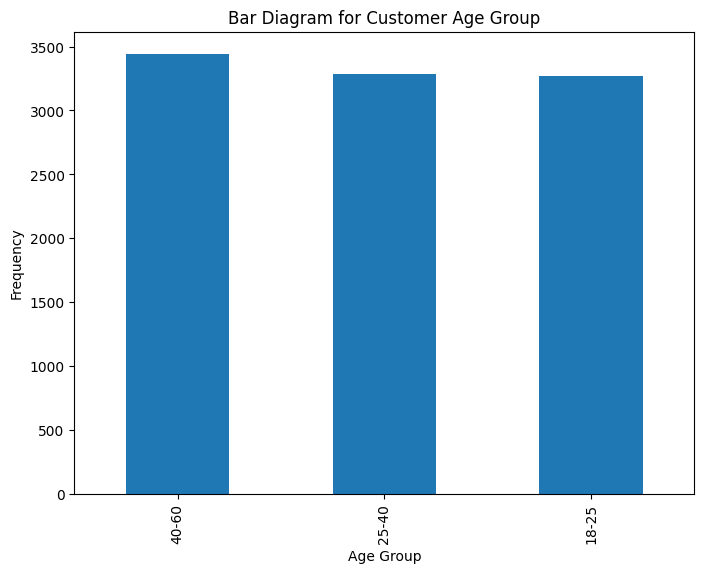

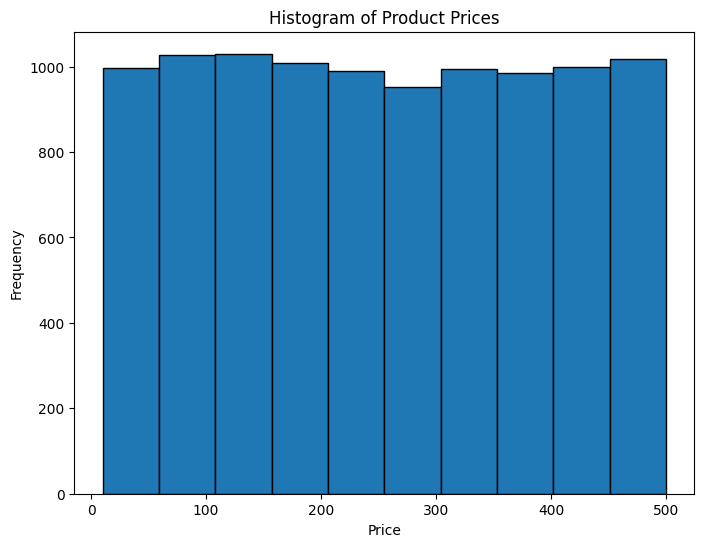

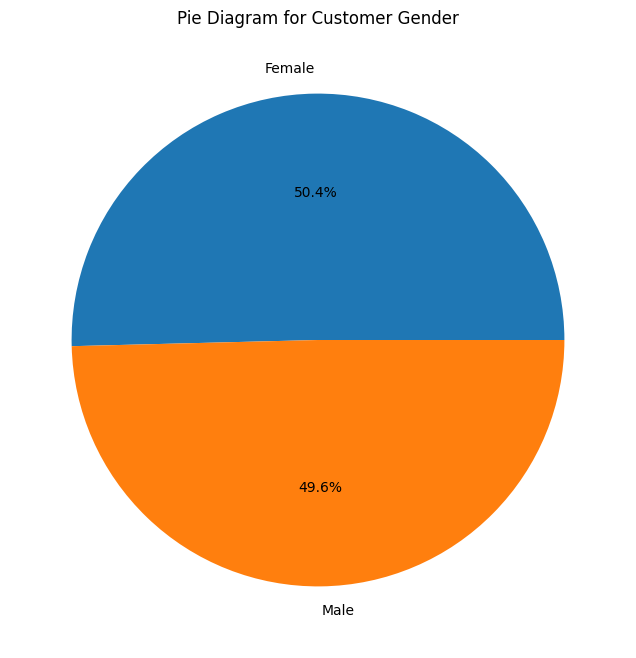

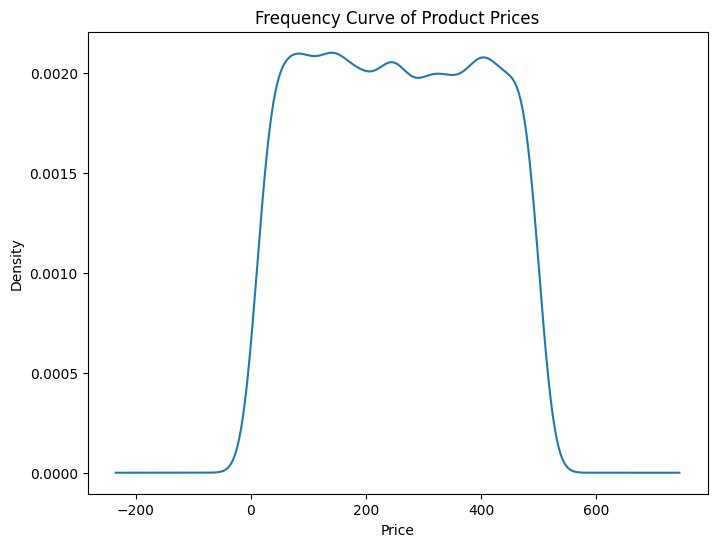

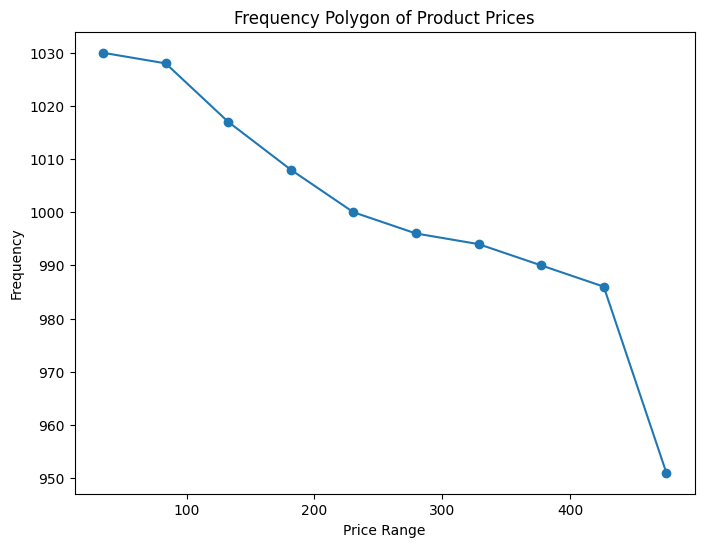

In [ ]:
import matplotlib.pyplot as plt

# Bar graph (discrete variable)
plt.figure(figsize=(8, 6))
discrete_freq.plot(kind='bar')
plt.title('Bar Diagram for Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

# Histogram (continuous variable)
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['Price'], bins=10, edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
pie_data = df_cleaned['Customer Demographics (Gender)'].value_counts()
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Pie Diagram for Customer Gender')
plt.show()

# Frequency curve (Kernel Density Estimation)
plt.figure(figsize=(8, 6))
df_cleaned['Price'].plot(kind='density')
plt.title('Frequency Curve of Product Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Frequency polygon
# Extract the midpoints of the intervals
midpoints = continuous_freq.index.categories.mid

plt.figure(figsize=(8, 6))
plt.plot(midpoints, continuous_freq.values, marker='o')
plt.title('Frequency Polygon of Product Prices')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()




## Step 5: Compute Summary Statistics
*   Mean
*   Median
*   Mode
*   Range
*   Inter Quartile Range(IQR)
*   Standard Deviation
*   Variance










In [ ]:
mean_price = df_cleaned['Price'].mean()

median_price = df_cleaned['Price'].median()

mode_price = df_cleaned['Price'].mode().iloc[0]

range_price = df_cleaned['Price'].max() - df_cleaned['Price'].min()

Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1

std_price = df_cleaned['Price'].std()

var_price = df_cleaned['Price'].var()

print("Summary Statistics:")
print("Mean:", mean_price)
print("Median:", median_price)
print("Mode:", mode_price)
print("Range:", range_price)
print("Interquartile Range (IQR):", IQR)
print("Standard Deviation:", std_price)
print("Variance:", var_price)

Summary Statistics:
Mean: 254.41532300000006
Median: 252.415
Mode: 67.43
Range: 489.83000000000004
Interquartile Range (IQR): 246.72000000000003
Standard Deviation: 141.81314003358182
Variance: 20110.96668618429


## Step 6: Compute Summary Statistics
*   Kurtosis
*   Skewness



In [ ]:
import pandas as pd

skewness_price = df_cleaned['Price'].skew()
kurtosis_price = df_cleaned['Price'].kurtosis()

skewness_type = "left skewed" if skewness_price < 0 else ("right skewed" if skewness_price > 0 else "symmetric")

kurtosis_type = "leptokurtic" if kurtosis_price > 0 else ("platykurtic" if kurtosis_price < 0 else "mesokurtic")

print("Skewness of Price:", skewness_price)
print("Kurtosis of Price:", kurtosis_price)
print("Skewness Type:", skewness_type)
print("Kurtosis Type:", kurtosis_type)


Skewness of Price: 0.016428801944609675
Kurtosis of Price: -1.2120765171870092
Skewness Type: right skewed
Kurtosis Type: platykurtic


## Step 7: Implement Linear Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned[['Price']]
y = df_cleaned['Customer Satisfaction Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.9923875596643543
R-squared: 0.0004044716353570621


## Predictive Machine Learning Model
* Decision Tree
* Random Forest
* Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_cleaned = pd.read_csv('ecommerce_cleaned.csv')

X = df_cleaned[['Price', 'Quantity', 'Customer Demographics (Age group)',
                'Customer Demographics (Gender)', 'Previous Purchase History',
                'Product Category', 'Brand', 'Discount Used']]
y = df_cleaned['Customer Satisfaction Rating']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Train the decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

# Train the random forest regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# Train the gradient boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("\nGradient Boosting:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

Decision Tree:
Mean Squared Error: 4.112
R-squared: -1.0630207173788295

Random Forest:
Mean Squared Error: 2.1191174
R-squared: -0.06317682362790866

Gradient Boosting:
Mean Squared Error: 2.0340630739310916
R-squared: -0.020504441141806495
